Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ ?                           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
366/366 ━━━━━━━━━━━━━━━━━━━━ 20s 40ms/step - accuracy: 0.6220 - loss: 0.9320 - val_accuracy: 0.7001 - val_loss: 0.6897
Epoch 2/5
366/366 ━━━━━━━━━━━━━━━━━━━━ 13s 37ms/step - accuracy: 0.7054 - loss: 0.6706 - val_accuracy: 0.7674 - val_loss: 0.5732
Epoch 3/5
366/366 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.7972 - loss: 0.5104 - val_accuracy: 0.7725 - val_loss: 0.6367
Epoch 4/5
366/366 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.8593 - loss: 0.4096 - val_accuracy: 0.7357 - val_loss: 0.6976
Epoch 5/5
366/366 ━━━━━━━━━━━━━━━━━━━━ 19s 34ms/step - accuracy: 0.8808 - loss: 0.3491 - val_accuracy: 0.7896 - val_loss: 0.6155
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7854 - loss: 0.6297
Test Accuracy: 0.7896


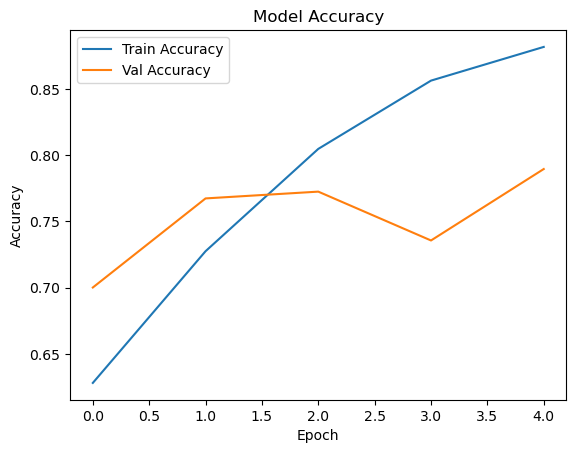

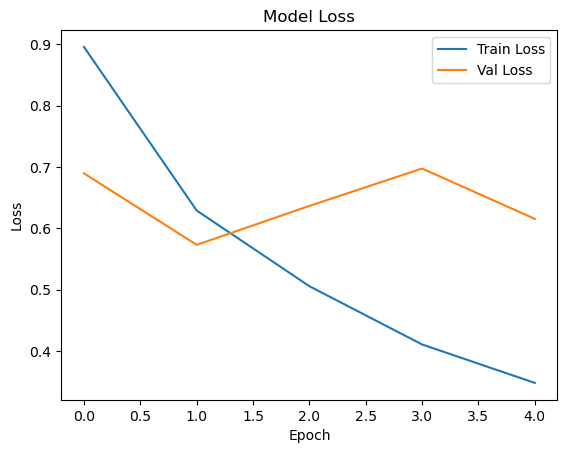

92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step
              precision    recall  f1-score   support

           0       0.83      0.92      0.88      1889
           1       0.63      0.43      0.51       580
           2       0.72      0.71      0.72       459

    accuracy                           0.79      2928
   macro avg       0.73      0.69      0.70      2928
weighted avg       0.78      0.79      0.78      2928



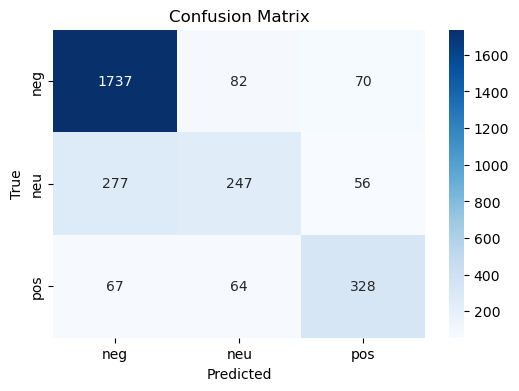

In [1]:
# 📘 02_LSTM_Model.ipynb (Starter LSTM Notebook)

# ✅ 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from keras.models import load_model

# ✅ Import shared preprocessing
from shared_preprocessing import preprocess_data, save_tokenizer_and_encoder

# ✅ 2. Load and Preprocess Data
path = "D:/Sentimental-Analysis/data/Tweets.csv"
df = pd.read_csv(path)
X, y, tokenizer, label_encoder = preprocess_data(df)

# ✅ 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ 4. Build LSTM Model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=64))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# ✅ 5. Train the Model
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

# ✅ 6. Evaluate
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc:.4f}")

# ✅ 7. Save Model and Tokenizer/Encoder
model.save("sentiment_lstm_model.keras")
save_tokenizer_and_encoder(tokenizer, label_encoder)

# ✅ 8. Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()

# ✅ 9. Classification Report & Confusion Matrix
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred_classes))

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['neg', 'neu', 'pos'], yticklabels=['neg', 'neu', 'pos'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# ✅ 10. Load Model Example (optional)
model = load_model("sentiment_lstm_model.keras")
